In [203]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# 1. Defining Problem Statement
<b> Business Problem </b>
The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

<b> Objective </b>
Create a descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

# Analysing basic metrics 

In [99]:
df = pd.read_csv('aerofit_treadmill.csv')
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [100]:
df.shape

(180, 9)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [102]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


Descriptive Analysis
- We surveyed 180 people in total.
- The average age of our customers is 28 years old. Half of them are younger than 26.
- On average, our customers have received 15 years of education. The most educated person has 21 years of education, while the least educated has 12.
- Our customers typically use our services 3.4 times per week. The most frequent user visits 7 times a week, while the least frequent visits 2 times.
- Customers rate their fitness level at an average of 3.3 out of 5.
- On average, our customers walk 103 miles. Most people walk nearly 115 miles, while the least active person walks 21 miles.
- The majority of our customers earn around $58,000 per year. The highest earner makes $104,000, while the lowest makes nearly $30,000.

# 2. Non-Graphical Analysis: Value counts and unique attributes 

In [204]:
# Total number of unique Product ids
df['Product'].nunique()

3

In [105]:
# unique list of product id
df['Product'].unique().tolist()

['KP281', 'KP481', 'KP781']

In [106]:
# Total number of unique ages
total_uniq_age = df['Age'].nunique()
total_uniq_age

32

In [107]:
# list of unique ages
df['Age'].unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 50, 45, 48, 42],
      dtype=int64)

In [108]:
# Number of Male and Female customers
df['Gender'].value_counts()

Gender
Male      104
Female     76
Name: count, dtype: int64

In [109]:
# list of unique Educations
df['Education'].unique().tolist()

[14, 15, 12, 13, 16, 18, 20, 21]

In [110]:
# Number of customer againts the rating scale 1 to 5
df['Fitness'].value_counts().sort_index()

Fitness
1     2
2    26
3    97
4    24
5    31
Name: count, dtype: int64

In [111]:
# Number of customers with 3 different product types
df['Product'].value_counts().sort_index()

Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64

In [112]:
# Number of customers counts on Usage
df['Usage'].value_counts().sort_index()

Usage
2    33
3    69
4    52
5    17
6     7
7     2
Name: count, dtype: int64

In [113]:
# Number of Single and Partnered customers
df['MaritalStatus'].value_counts()

MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64

<b> conversion of categorical attributes to 'category' </b>

In [114]:
# Converting Int data type of fitness rating to object data type
df_category = df
df_category['Fitness_category'] = df.Fitness
df_category.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Fitness_category
0,KP281,18,Male,14,Single,3,4,29562,112,4
1,KP281,19,Male,15,Single,2,3,31836,75,3
2,KP281,19,Female,14,Partnered,4,3,30699,66,3
3,KP281,19,Male,12,Single,3,3,32973,85,3
4,KP281,20,Male,13,Partnered,4,2,35247,47,2


In [115]:
df_category["Fitness_category"].replace({1:"Poor Shape",
                            2:"Bad Shape",
                            3:"Average Shape",
                            4:"Good Shape",
                            5:"Excellent Shape"},inplace=True)
df_category.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Fitness_category
0,KP281,18,Male,14,Single,3,4,29562,112,Good Shape
1,KP281,19,Male,15,Single,2,3,31836,75,Average Shape
2,KP281,19,Female,14,Partnered,4,3,30699,66,Average Shape
3,KP281,19,Male,12,Single,3,3,32973,85,Average Shape
4,KP281,20,Male,13,Partnered,4,2,35247,47,Bad Shape


<b> Categorization of Fitness Rating to following descriptive categories </b>

- Poor Shape
- Bad Shape
- Average Shape
- Good Shape
- Excellent Shape

In [116]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


# Statistical Summary

In [117]:
# for unique list of products, listed in percentage
sr = df['Product'].value_counts(normalize=True)
stat = sr.map(lambda calc: round(100*calc,2))
stat

Product
KP281    44.44
KP481    33.33
KP781    22.22
Name: proportion, dtype: float64

- 44.44% of customers bought KP281 product type
- 33.33% of customers bought KP481 product type
- 22.22% of customers bought KP781 product type

In [118]:
# Customer Gender statistics (listed in %)
gender = df['Gender'].value_counts(normalize=True)
gender_res = gender.map(lambda calc: round(100*calc,2))
gender_res

Gender
Male      57.78
Female    42.22
Name: proportion, dtype: float64

Male customers are 57.78% and Female customers are 42.22% 

In [126]:
# Customers Marital Status (listed in %)
marital_status = df['MaritalStatus'].value_counts(normalize=True)
marital_status_res = marital_status.map(lambda calc:round(100*calc,2))
marital_status_res

MaritalStatus
Partnered    59.44
Single       40.56
Name: proportion, dtype: float64

- 59.44% are Married/Partnered customers
- 40.56% are Single customers

In [127]:
# Usage: Number of days used per week (listed in %)
usage = df['Usage'].value_counts(normalize=True).map(lambda calc:round(100*calc,2)).reset_index()
usage.rename(columns={'index':'DaysPerWeek'},inplace=True)
usage

,Usage,proportion
0,3,38.33
1,4,28.89
2,2,18.33
3,5,9.44
4,6,3.89
5,7,1.11


- Around 39% of customers use 3 days per week
- Less than 2% of customers use 7 days per week

In [128]:
# Customer rating of their fitness (listed in %)
rating = df['Fitness'].value_counts(normalize=True).map(lambda calc:round(100*calc,2)).reset_index()
rating.rename(columns={'index':'Rating'},inplace=True)
rating

,Fitness,proportion
0,3,53.89
1,5,17.22
2,2,14.44
3,4,13.33
4,1,1.11


- More than 53% of customers have rated themselves as 3 i.e., average in fitness
- 14% of customers have rated their fitness less than average
- Over 17% of customers have peak fitness ratings

# 3. Visual Analysis - Univariate & Bivariate

<b> Univariate Analysis </b>
- For Continous Variable(s):Distplot, countplot, histogram for univariate analysis

<function matplotlib.pyplot.show(close=None, block=None)>

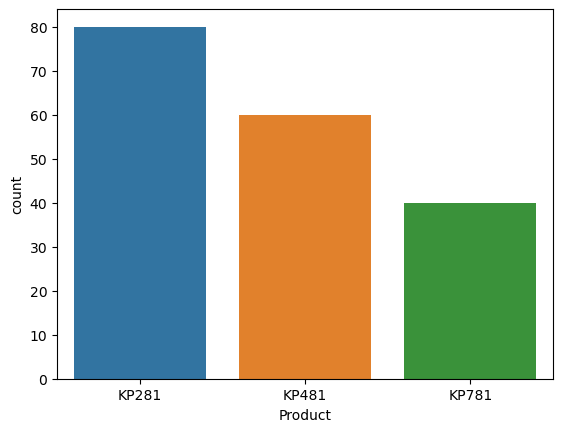

In [129]:
# Product Analysis - count plot
sns.countplot(data=df,x='Product')
plt.show

- KP281 is the most commonly purchase product type
- KP481 is the second most top purchased product type
- KP781 is the least purchased product type

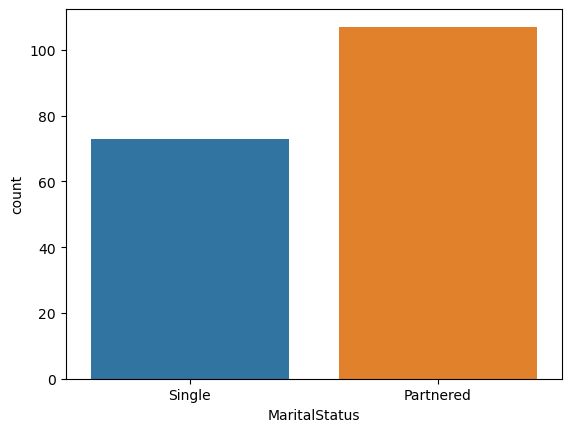

In [130]:
# Marital Status Analysis - Count plot
sns.countplot(data=df,x='MaritalStatus')
plt.show()

Most products purchased by couples/Married/Partnered customer category

<function matplotlib.pyplot.show(close=None, block=None)>

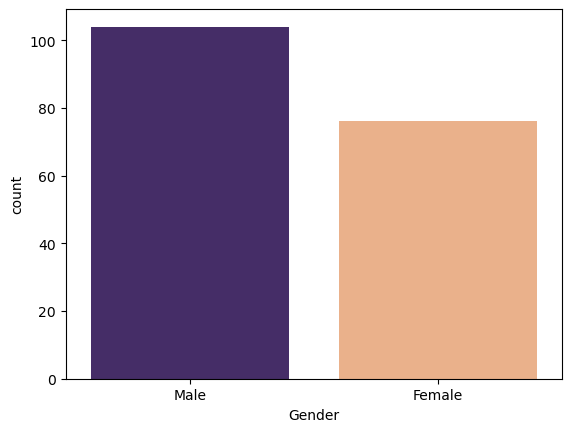

In [131]:
# Gender Analysis - Count Plot
sns.countplot(data=df,x='Gender',palette=['#432371',"#FAAE7B"])
plt.show

- Most products purchased by Males, females are less interested in the product compared to Males

<function matplotlib.pyplot.show(close=None, block=None)>

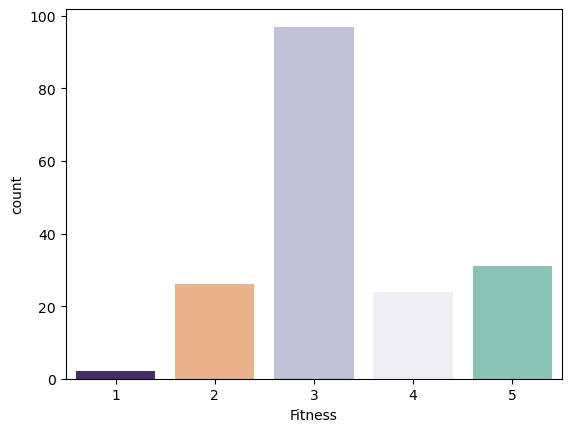

In [132]:
# Fitness rating analysis - count plot
sns.countplot(data=df,x='Fitness',palette=['#432371',"#FAAE7B","#bcbddc", "#efedf5",'#7fcdbb'])
plt.show

- More than 90 customers have rated their physical fitness rating as Average (3)

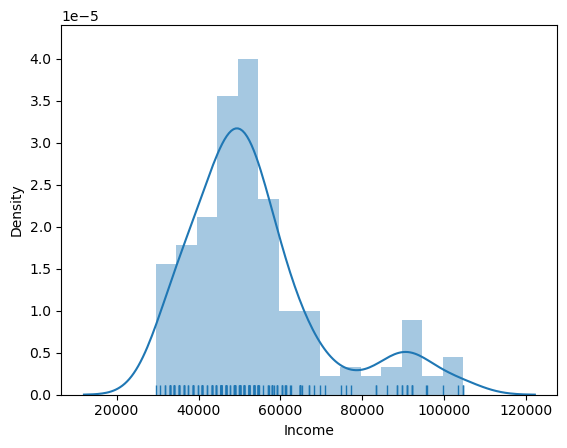

In [133]:
# Income Analysis - Distplot
sns.distplot(df.Income,rug=True)
plt.show()

- Most of customers who have purchased the product have a average income between 40K to 60K
- Average Income density is over 3.0

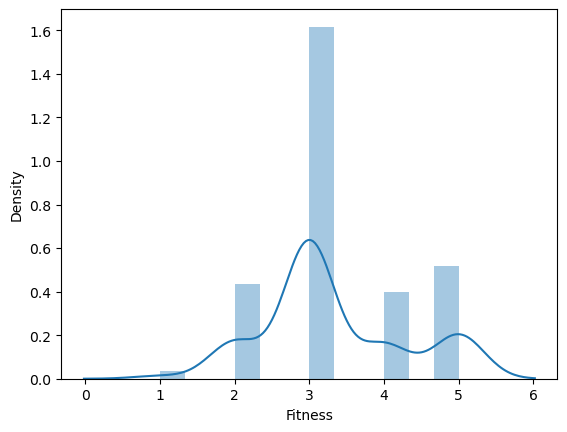

In [134]:
# Fitness Rating Analysis - Distplot
sns.distplot(df.Fitness)
plt.show()

- Over 1.5 density customer population have rated their physical fitness rating as Average
- Second highest customer population density have rated Excellent shape as their fitness ratingv

<Axes: xlabel='Income', ylabel='Count'>

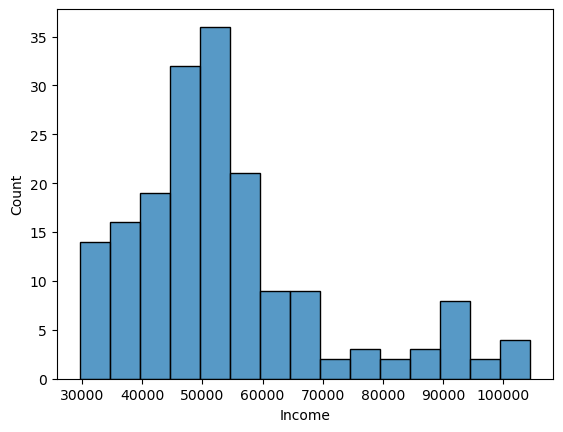

In [135]:
# Income Analysis - Histogram
sns.histplot(data=df,x='Income')

- More than 35 customers earn 50-55K per year
- More than 30 customers earn 45-50K per year
- More than 20 customers earn 55-60K per year

<Axes: xlabel='Education', ylabel='Count'>

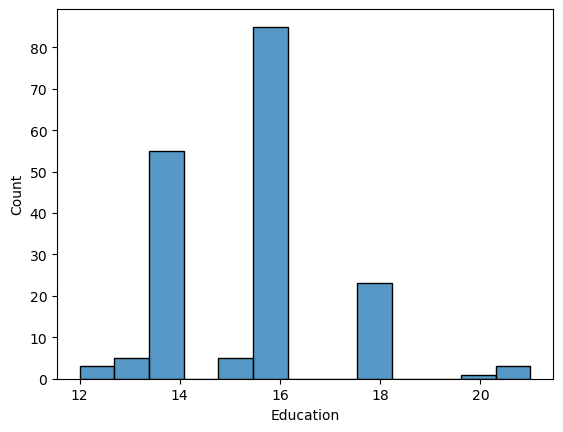

In [136]:
# Education Analysis - Histogram
sns.histplot(data=df,x='Education')

- Highest number of customers have 16 as their Education
- After that, the next most common education level is 14 years.
- The least common education level among our customers is 20 years.

<Axes: xlabel='Usage', ylabel='Count'>

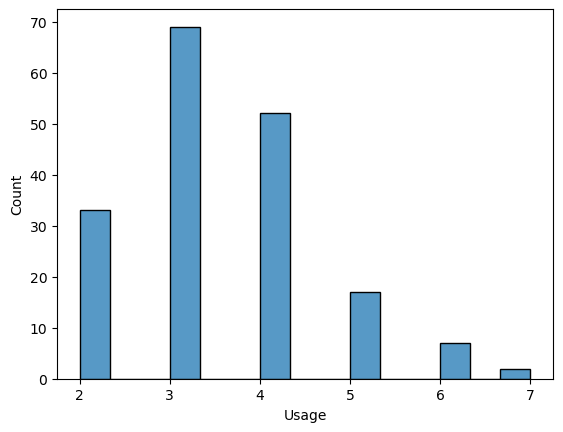

In [137]:
# Usage Analysis - Histogram
sns.histplot(data=df,x='Usage')

- Most customers use our product 3 days a week.
- The next most common usage is 4 days a week, followed by 2 days a week.
- Only a small number of customers use the product every day of the week.

<Axes: xlabel='Fitness', ylabel='Count'>

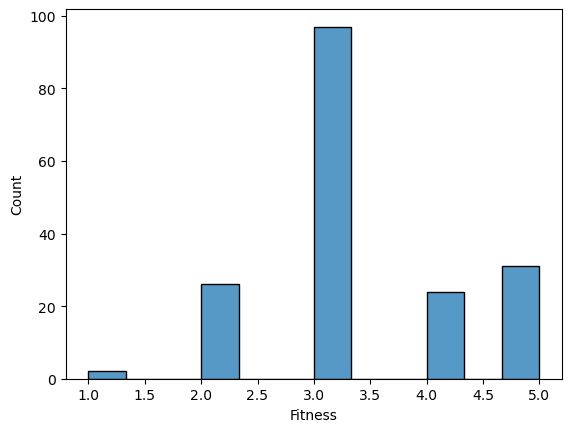

In [138]:
# Fitness Analysis - Histogram
sns.histplot(data=df,x='Fitness')

- Average shape is the most rating customers have given for fitness rating
- Around 40 customers have stated Excelled Shape as fitness rating

<b> For categorical variable(s): Boxplot </b>

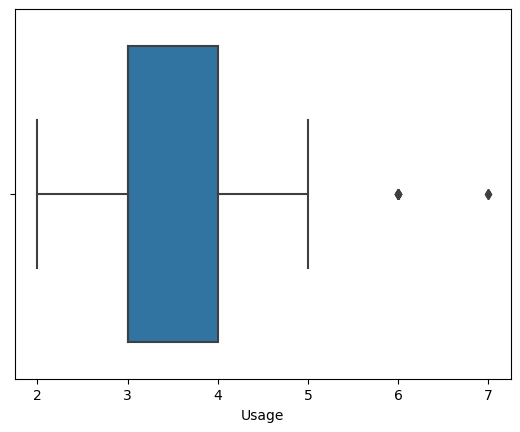

In [139]:
# Usage Analysis - Box plot
sns.boxplot(data=df,x='Usage')
plt.show()

- 3 to 4 days is the most preferred usage days for customers
- 6 and 7 days per week is roughly the usage days for few customers (Outliers)

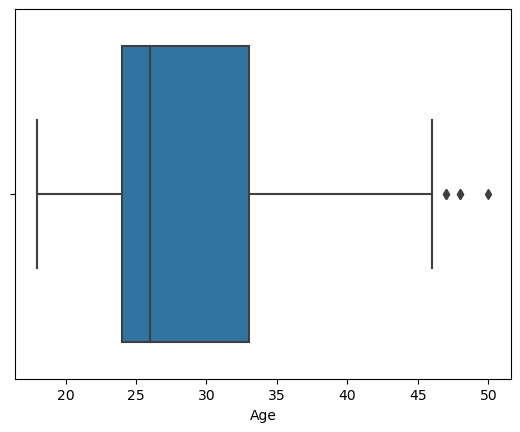

In [140]:
# Age Analysis - Box plot
sns.boxplot(data=df,x='Age')
plt.show()

- 23 to 34 is the most common customer age group that has purchased the product
- Above 45 years old customers are very few compared to the young age group given in the dataset

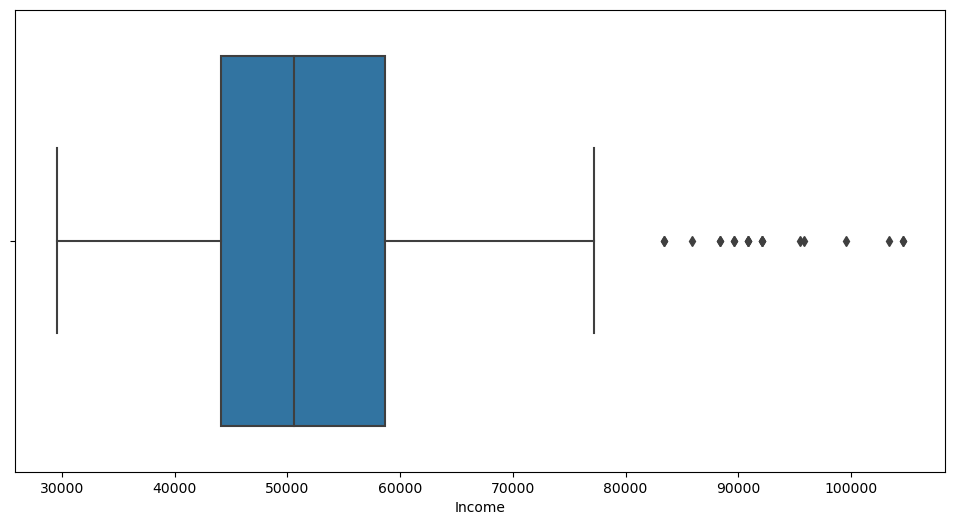

In [141]:
# Income Analysis - Box plot
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x='Income')
plt.show()

- Few customers have income above 80K per annum(Outliers)
- Most customers earn from 45K to around 60K per annum

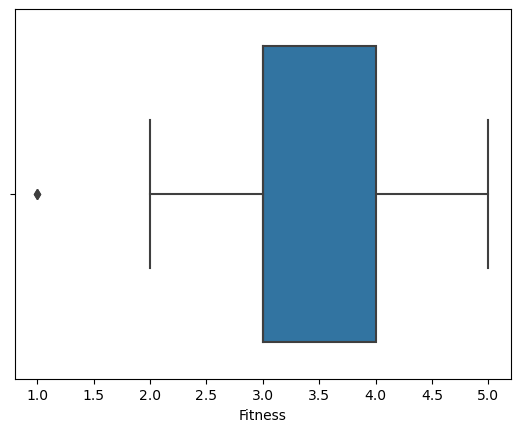

In [142]:
# Fitness Rating Analysis - Box plot
sns.boxplot(data=df,x='Fitness')
plt.show()

- Couple of customers have rated their fitness rating as 1 - Poor Shape
- Most customers have rated fitness rating as 3.0 to 4.0

<b> For correlation: Heatmaps, Pairplots </b>

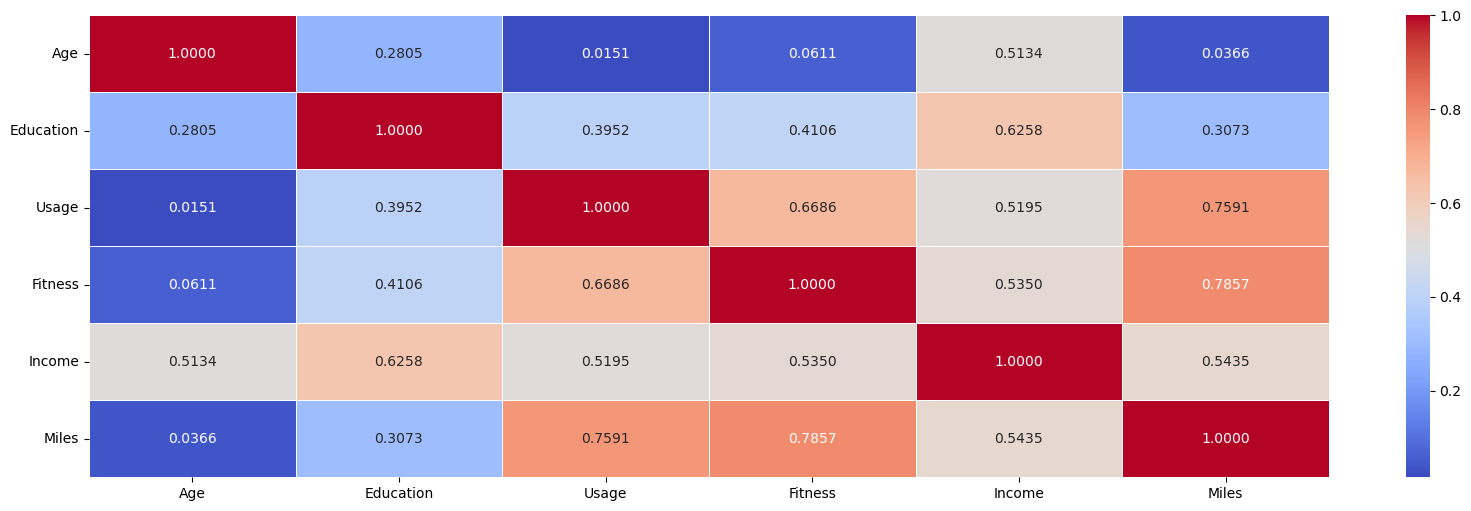

In [143]:
#Correlation HeatMap
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(20, 6))
ax = sns.heatmap(numeric_df.corr(), annot=True, fmt='.4f', linewidths=.5, cmap='coolwarm')
plt.yticks(rotation=0)
plt.show()

In the above heatmap linear relationship between data points is evaluated

- Correlation between Age and Miles is 0.0366
- Correlation between Education and Income is 0.6258
- Correlation between Usage and Fitness is 0.6686
- Correlation between Fitness and Age is 0.0611
- Correlation between Income and Usage is 0.5195
- Correlation between Miles and Age is 0.0366

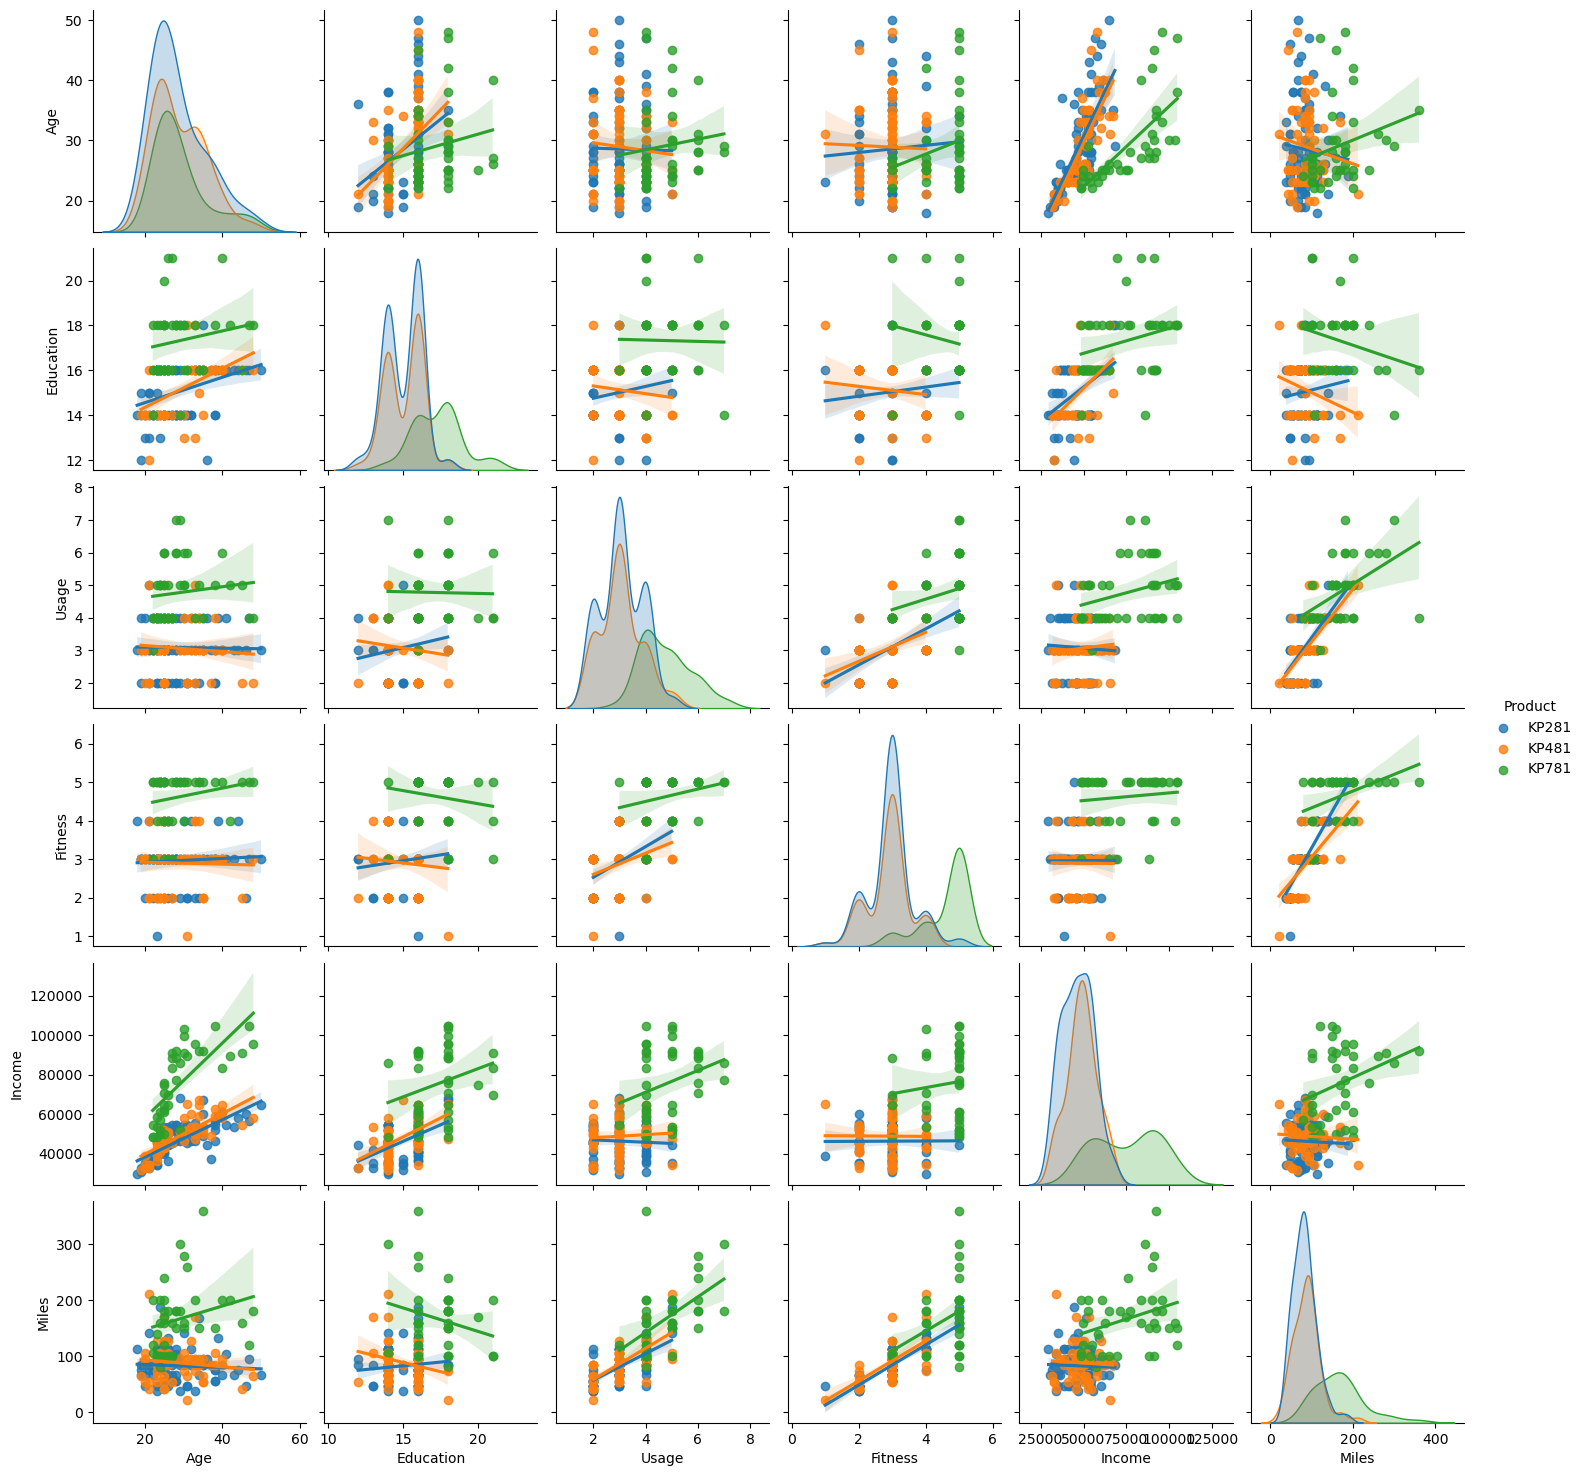

In [144]:
# Product Analysis - Pair Plot
sns.pairplot(df,hue='Product',kind='reg')
plt.show()

In the above pairplot the correlation with products and different attributes are as similar to previous observation

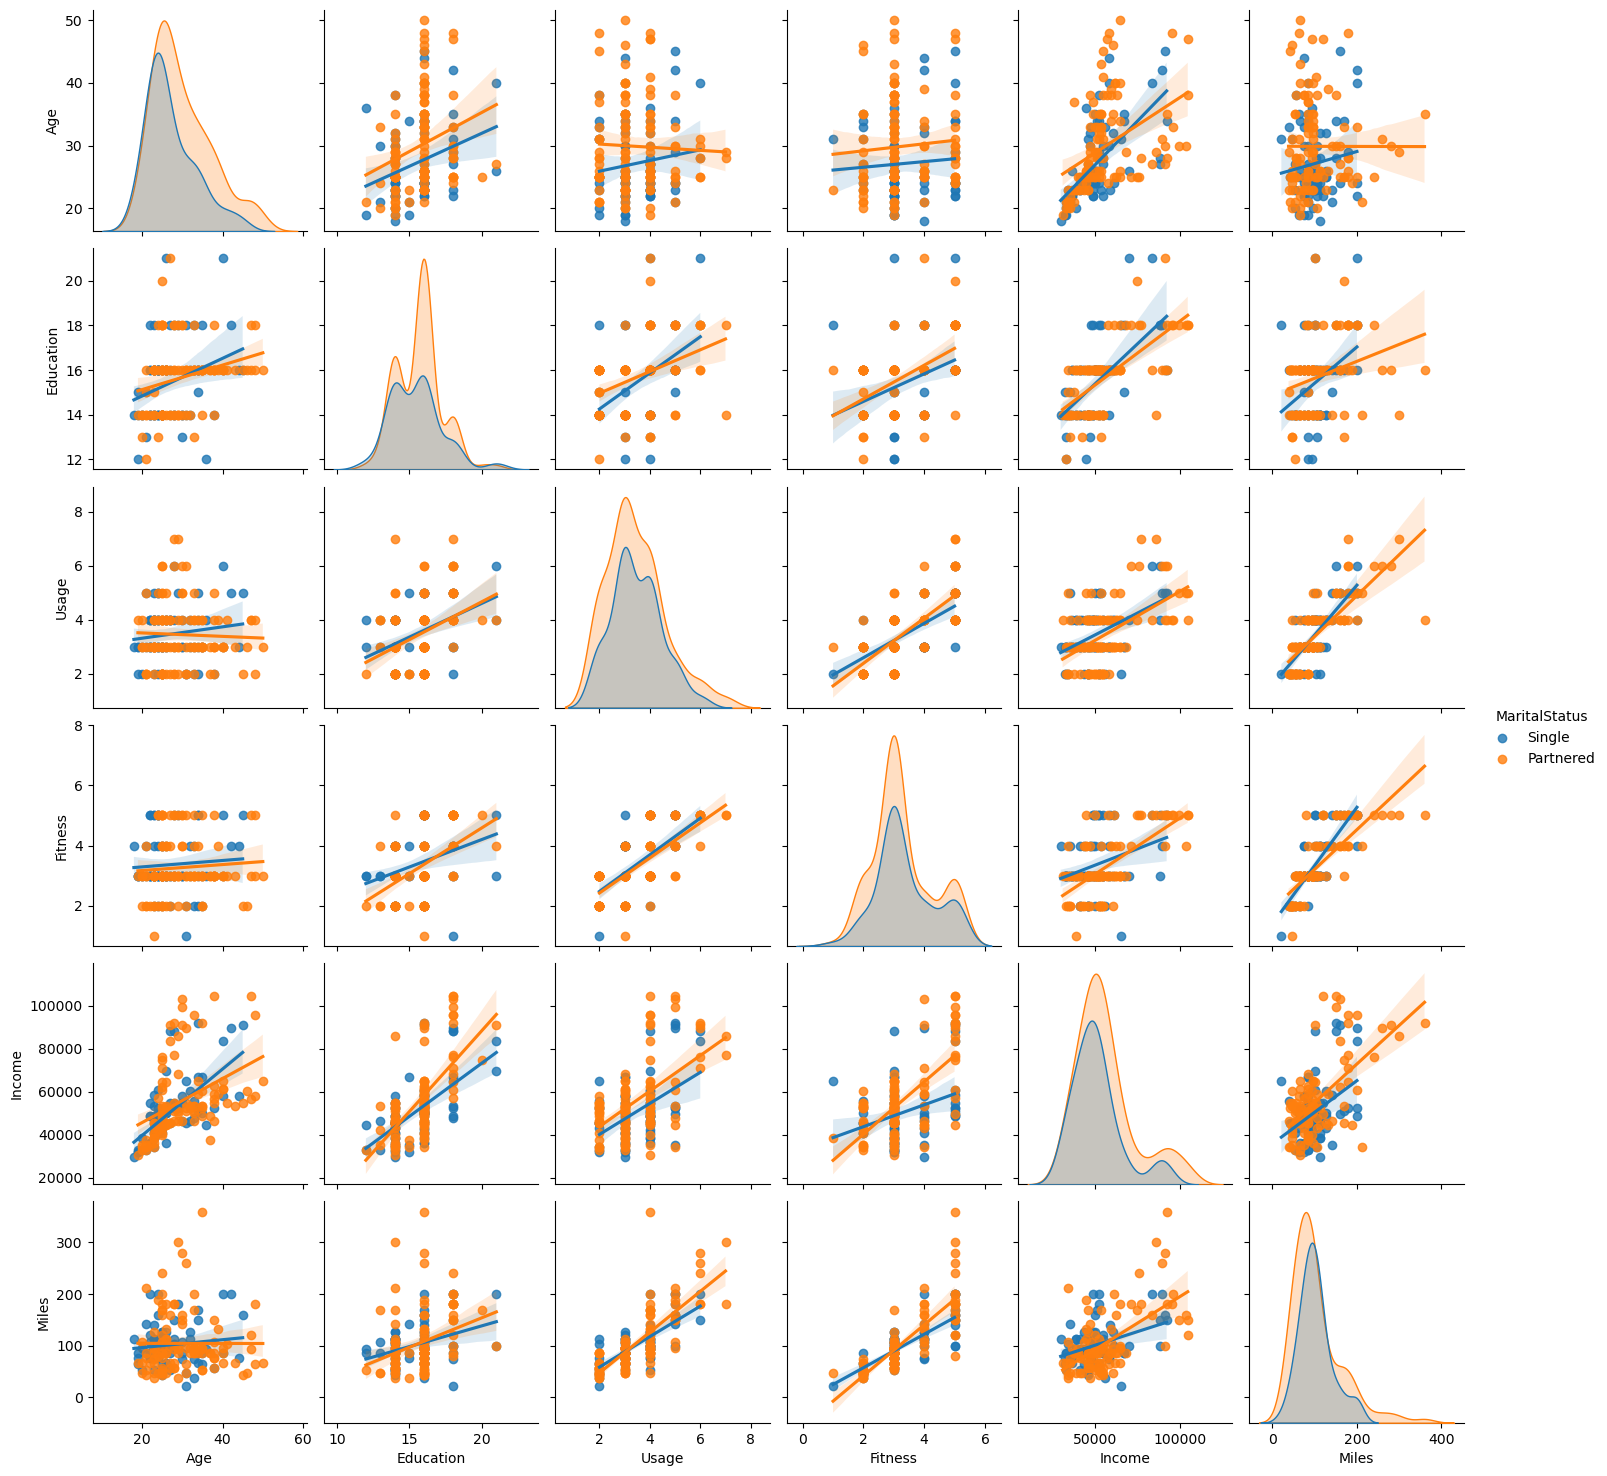

In [145]:
# Marital Status - pair plot
sns.pairplot(df,hue='MaritalStatus',kind='reg')
plt.show()

In the above pair plot the correlation with other attributes are pivotted around the marital status of the customer

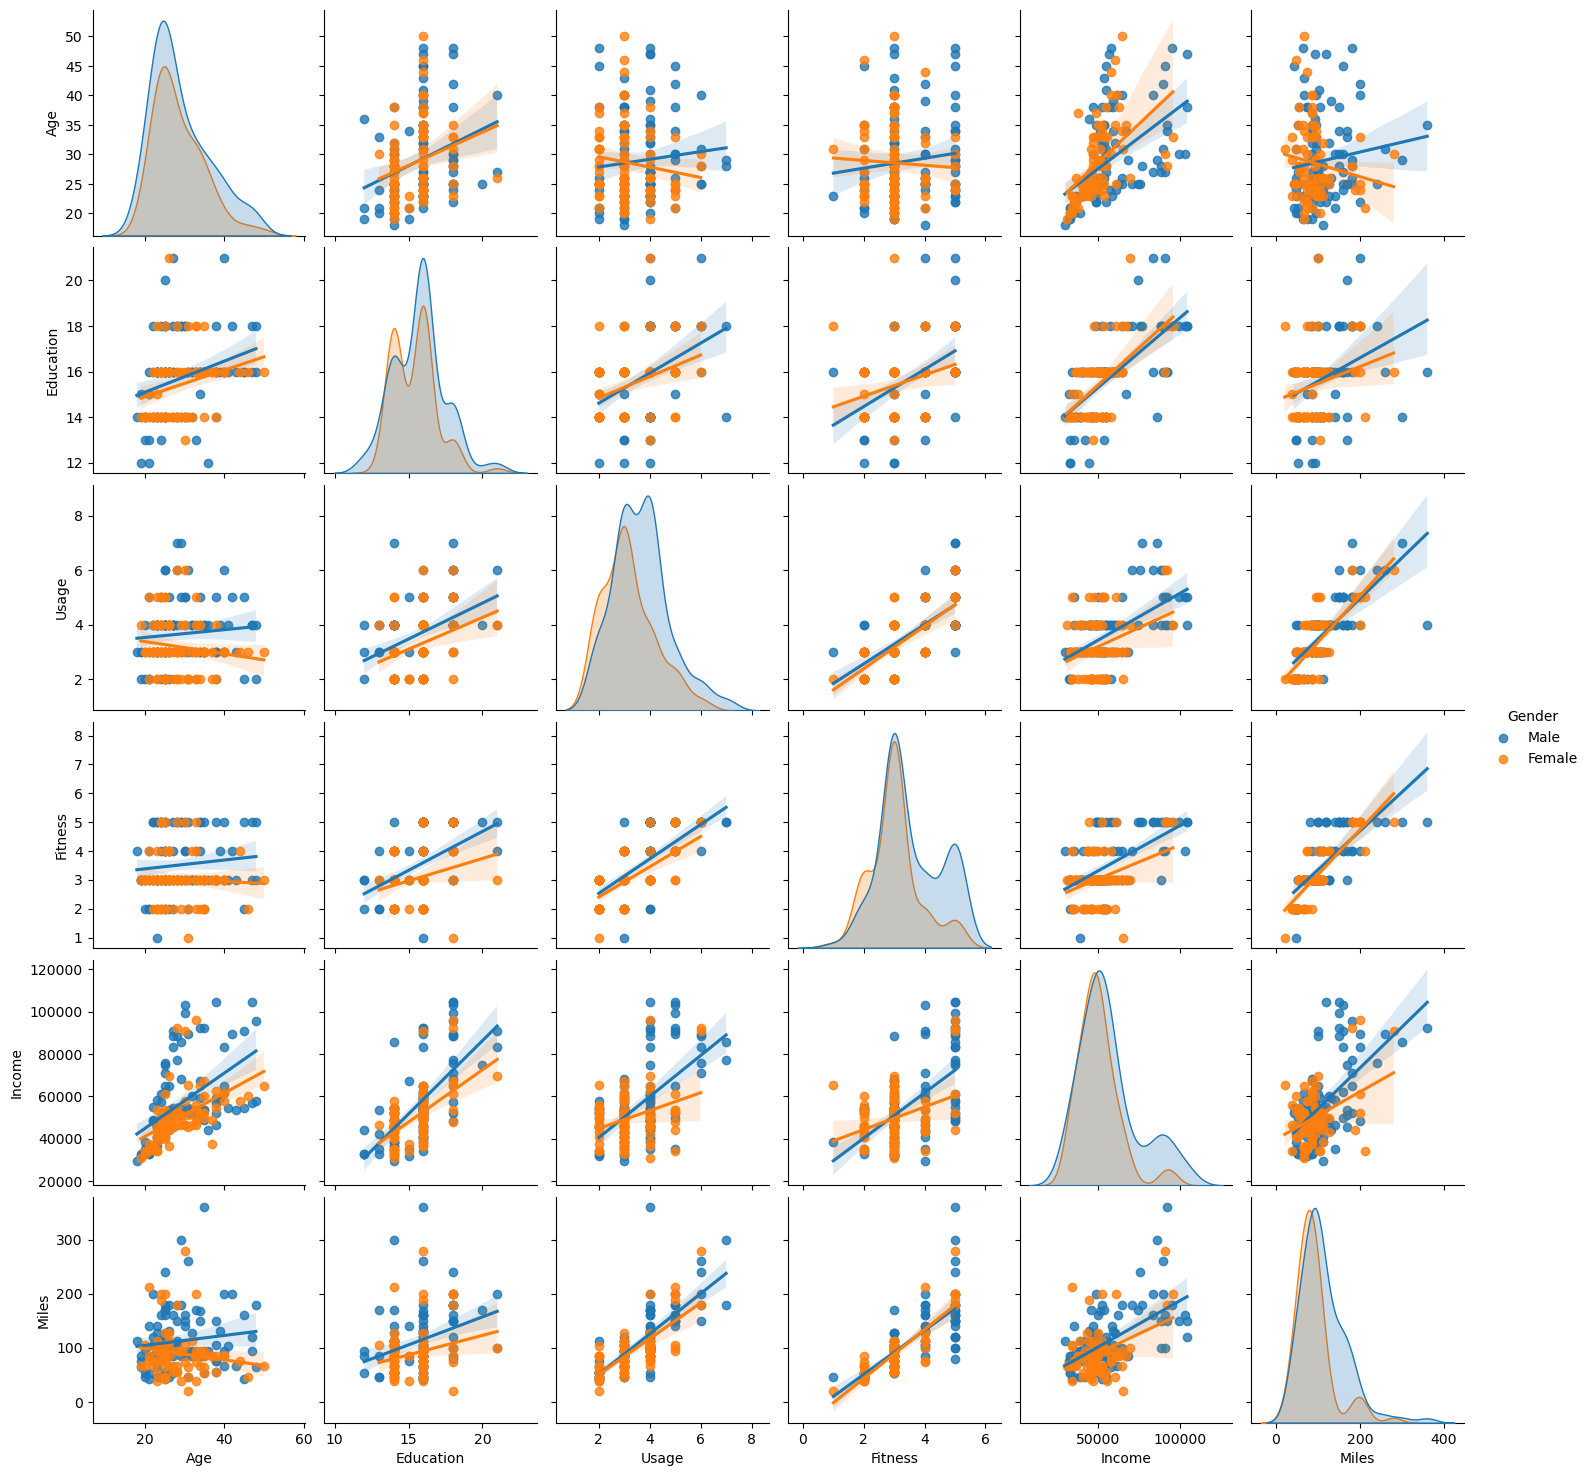

In [146]:
# Gender Analysis - Pair Plot
sns.pairplot(df,hue='Gender',kind='reg')
plt.show()

Here the pair plot's correlation is same as the above mentioned heatmap

<b> Bivariate Analysis </b>

In [147]:
# Average usage of each product type by the customer
df.groupby('Product')['Usage'].mean()

Product
KP281    3.087500
KP481    3.066667
KP781    4.775000
Name: Usage, dtype: float64

- Mean usage for product KP281 is 3.08
- Mean usage for product KP481 is 3.06
- Mean usage for product KP781 is 4.77

In [148]:
# Average Age of customer using each product
df.groupby('Product')['Age'].mean()

Product
KP281    28.55
KP481    28.90
KP781    29.10
Name: Age, dtype: float64

- Mean Age of the customer who purchased product KP281 is 28.55
- Mean Age of the customer who purchased product KP481 is 28.90
- Mean Age of the customer who purchased product KP781 is 29.10

In [149]:
# Average Education of customer using each product
df.groupby('Product')['Education'].mean()

Product
KP281    15.037500
KP481    15.116667
KP781    17.325000
Name: Education, dtype: float64

- Mean Education qualification of the customer who purchased product KP281 is 15.03
- Mean Education qualification of the customer who purchased product KP481 is 15.11
- Mean Education qualification of the customer who purchased product KP781 is 17.32

In [150]:
# Average customer fitness rating for each product type purchased
df.groupby('Product')['Fitness'].mean()

Product
KP281    2.9625
KP481    2.9000
KP781    4.6250
Name: Fitness, dtype: float64

- Customer fitness mean for product KP281 is 2.96
- Customer fitness mean for product KP481 is 2.90
- Customer fitness mean for product KP781 is 4.62

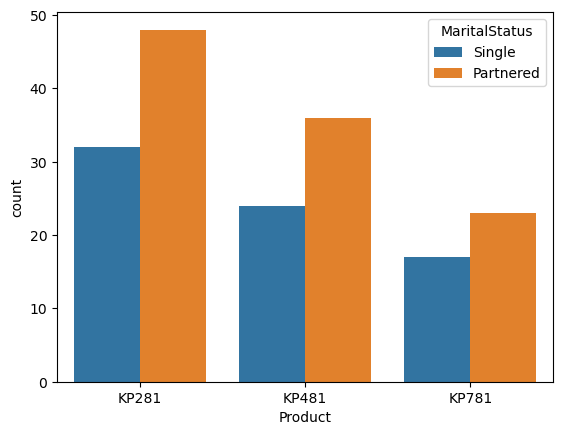

In [151]:
# Product purchased among Married/Partnered and Single
sns.countplot(data=df,x='Product',hue='MaritalStatus')
plt.show()

From the above countplot

- Most customers prefer KP281 as their top choice product.
- Following KP281, the next popular choice is KP481.
- Among our customers, those who are partnered are the main buyers of our products compared to singles.

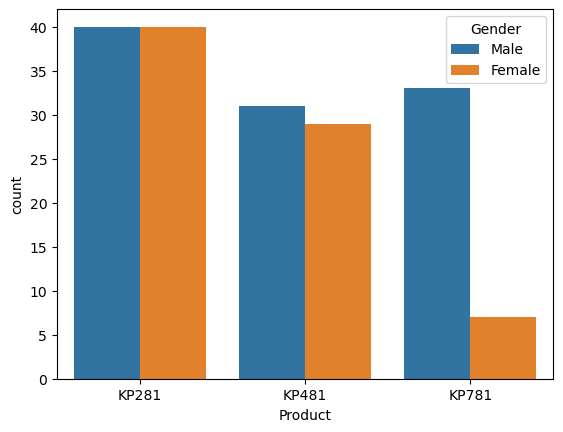

In [152]:
# Product purchased among Male and Female
sns.countplot(data=df,x='Product',hue='Gender')
plt.show()

- Both male and female customers equally like the KP281 product.
- However, the KP781 product is mostly preferred by male customers.
- Overall, male customers are the biggest buyers of our products.

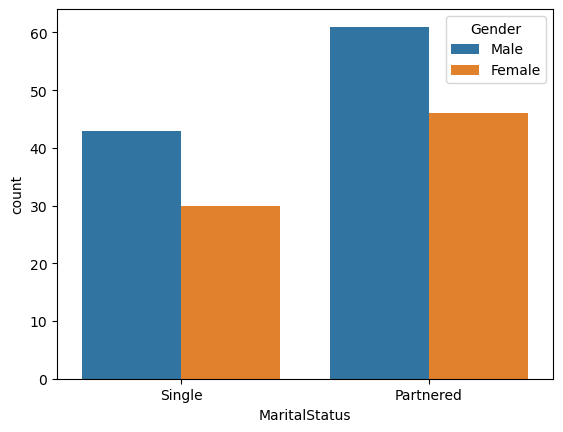

In [153]:
# Count among Gender and their Marital Status
sns.countplot(data=df,x='MaritalStatus',hue='Gender')
plt.show()

- Partnered customers are the biggest purchasers of the Aerofit product.
- Among both single and partnered customers, males make up the majority of buyers.
- Female customers make up a smaller portion of buyers compared to males.

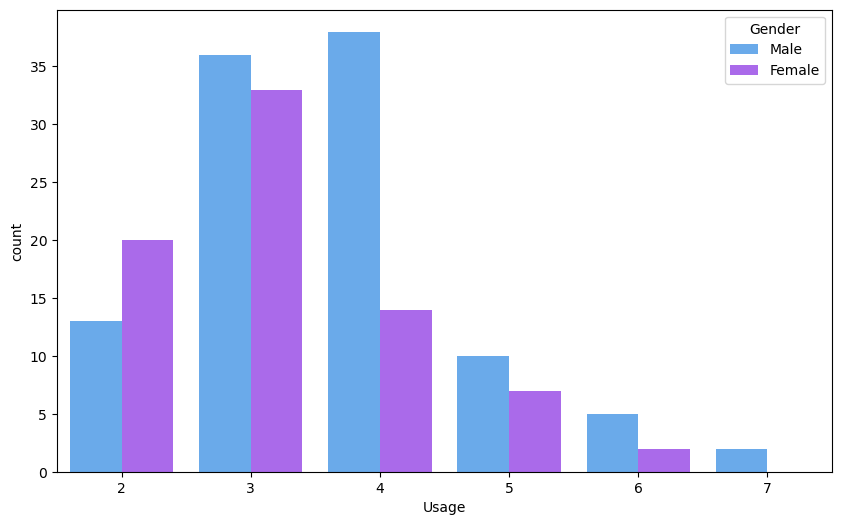

In [154]:
# Purchased product usage among Gender
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='Usage',hue='Gender',palette='cool')
plt.show()

- Male customers typically use our product 4 days a week.
- Female customers tend to use it 3 days a week.
- Only a few male customers use it every day, while the most frequent usage among female customers is 6 days a week.

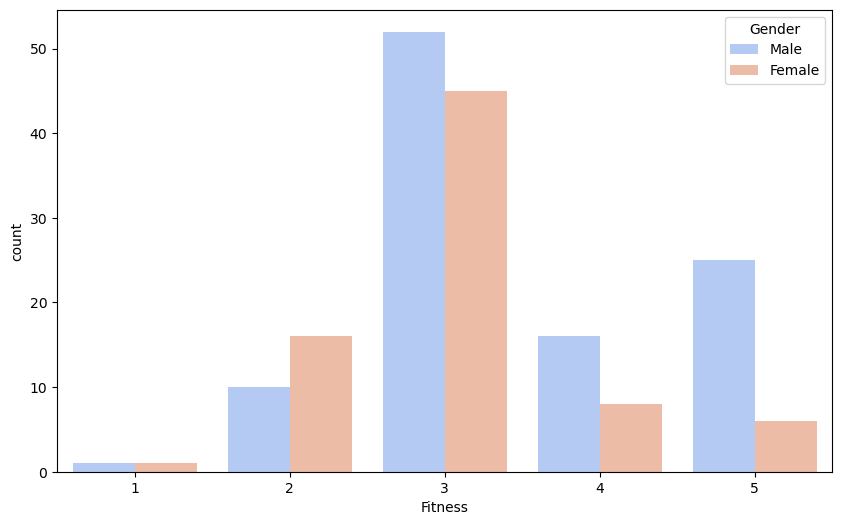

In [155]:
# Fitness rating among the customers categorised by Gender
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='Fitness',hue='Gender',palette='coolwarm')
plt.show()

- Among the fitness rating both Male and Female most have rated as average
- Significant number of Male customers are at Excellent shape compared to Female customers

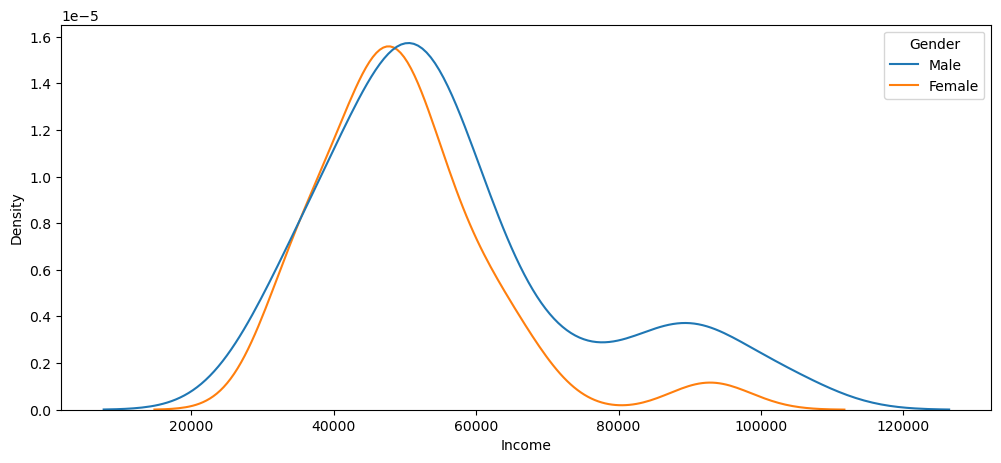

In [156]:
# Product purchased Customers Income and their Gender
plt.figure(figsize=(12,5))
sns.kdeplot(data=df,x='Income',hue='Gender')
plt.show()

From the above diagram, we can conclude the spike from 40K to around 80K is the most common income per annum of the customers

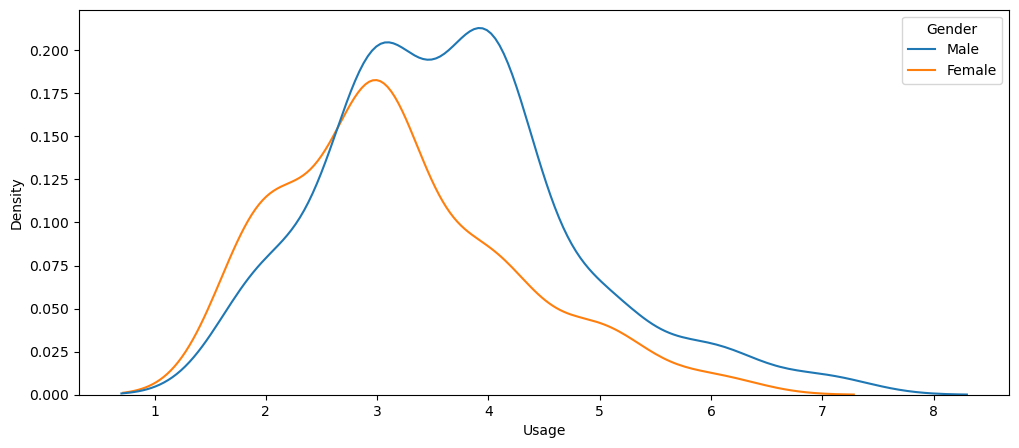

In [157]:
# Product purchased Customers Usage per week and their Gender
plt.figure(figsize=(12,5))
sns.kdeplot(data=df,x='Usage',hue='Gender')
plt.show()

- Male customers usage is significantly higher the female customer
- Female customer's lack consistency after the 3 days per week

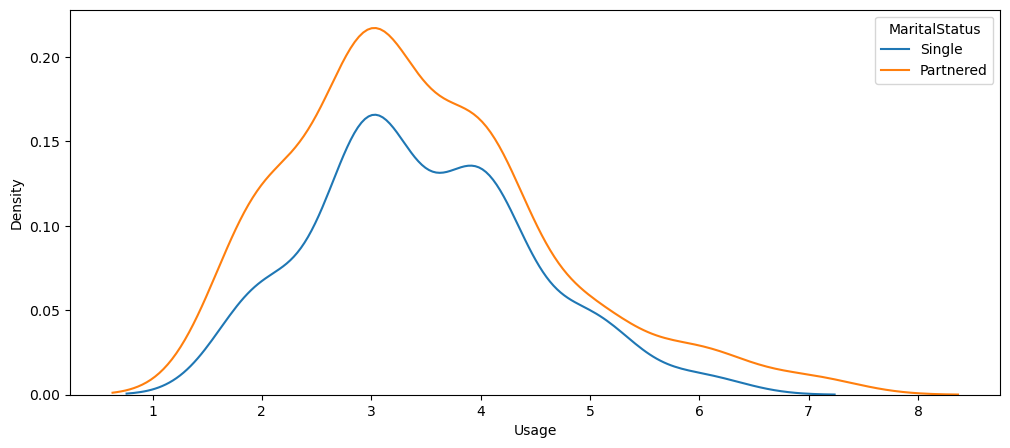

In [158]:
# Product purchased Customers Usage per week and their Marital Status
plt.figure(figsize=(12,5))
sns.kdeplot(data=df,x='Usage',hue='MaritalStatus')
plt.show()

- Partnered customers usage is higher than single customers
- Partnered customers also have greater consistency per week of 7 days per week than single customers

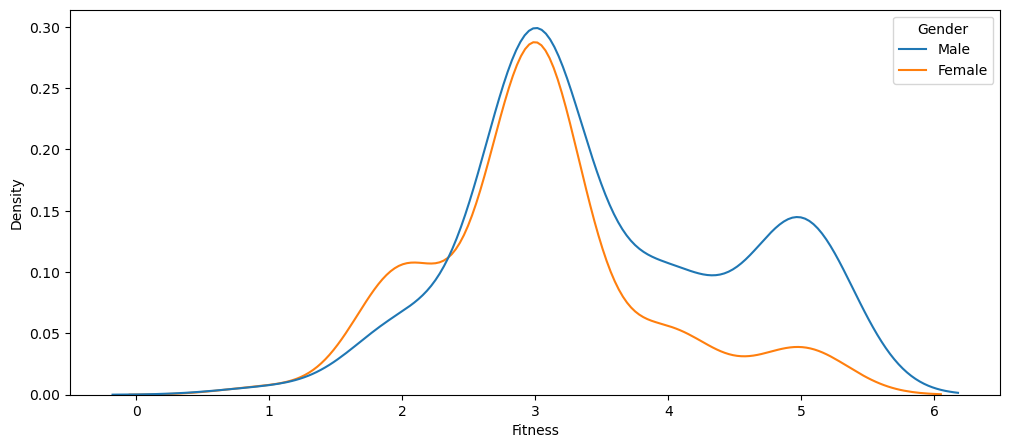

In [159]:
# Product purchased Customers Fitness Rating and their Gender
plt.figure(figsize=(12,5))
sns.kdeplot(data=df,x='Fitness',hue='Gender')
plt.show()

- Male customers are in better shape the female customers
- Though Female customers do not have poor shape, they are also not in excellent shape
- Some Male customers excellent body shape and few customers have poor shape as well

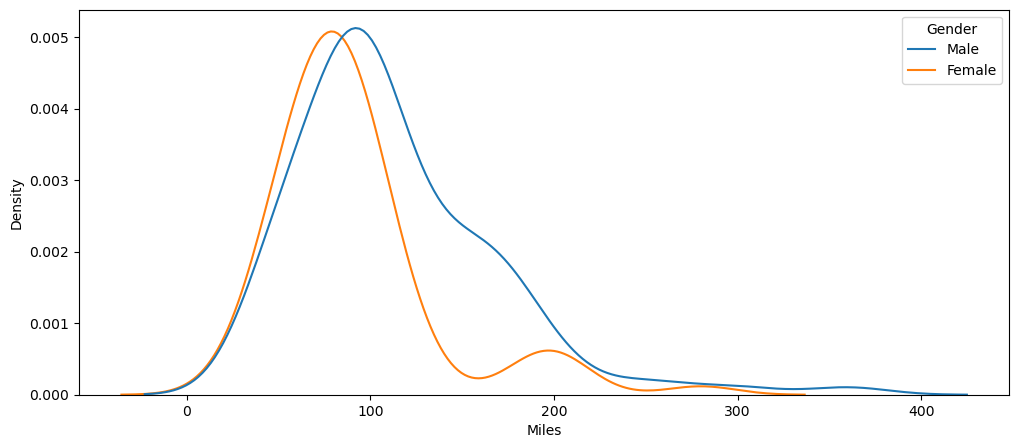

In [160]:
# Distance covered by each Gender among the customers
plt.figure(figsize=(12,5))
sns.kdeplot(data=df,x='Miles',hue='Gender')
plt.show()

- Male customers have a consistent distance coverage than female customers
- Female customers have max distance covered as just over 300 miles

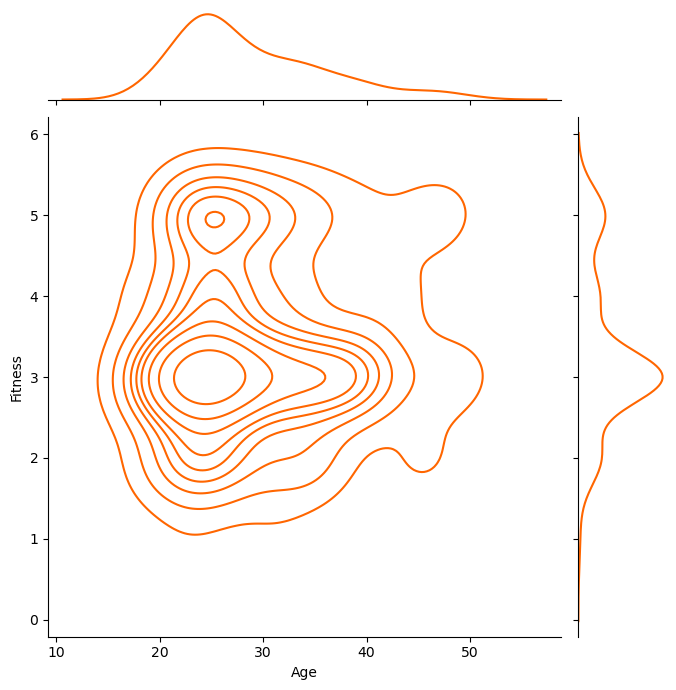

In [161]:
# Joint Histogram with KDE plot
sns.jointplot(x="Age", y="Fitness", data=df,height = 7,kind="kde",color="#FF6600")
plt.show()

- Majority of the customer Age group is between 20 to mid 30s who have rated atleast average

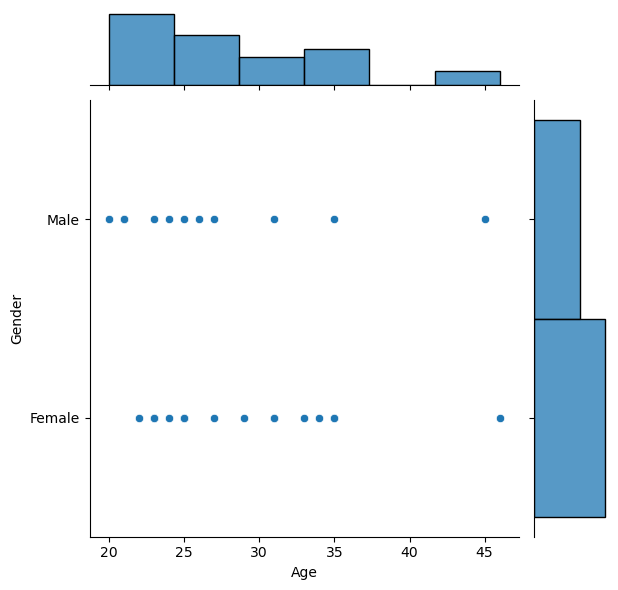

In [162]:
# Scatterplot for customers Gender and Age who rated less than 2 in Fitness rating
sns.jointplot(x='Age',y='Gender',data=df[df.Fitness<3])
plt.show()

- Above Joint plot describes the relationship between the customer age and their gender grouping.
- Product is not familiar with older or middle age womens

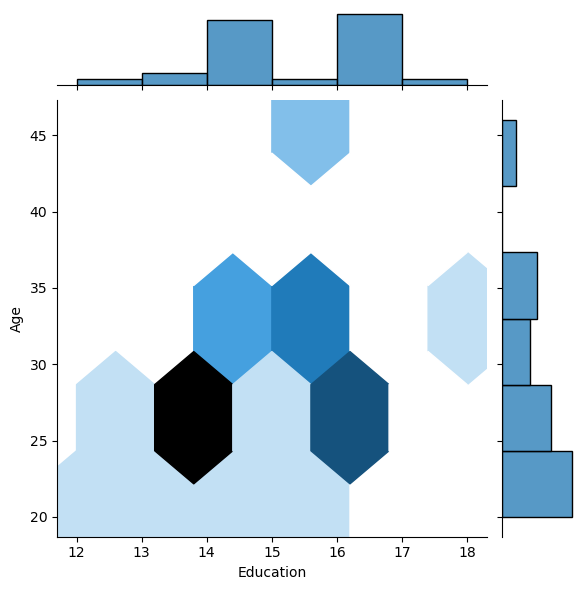

In [163]:
# Hex Scatterplot for customers Education and Age who rated less than 2 in Fitness rating
sns.jointplot(x='Education',y='Age',kind='hex',data=df[df.Fitness<3])
plt.show()

- Majority of the age and education density falls on 25-30 age group and 13-14 education

<Axes: xlabel='Miles', ylabel='Income'>

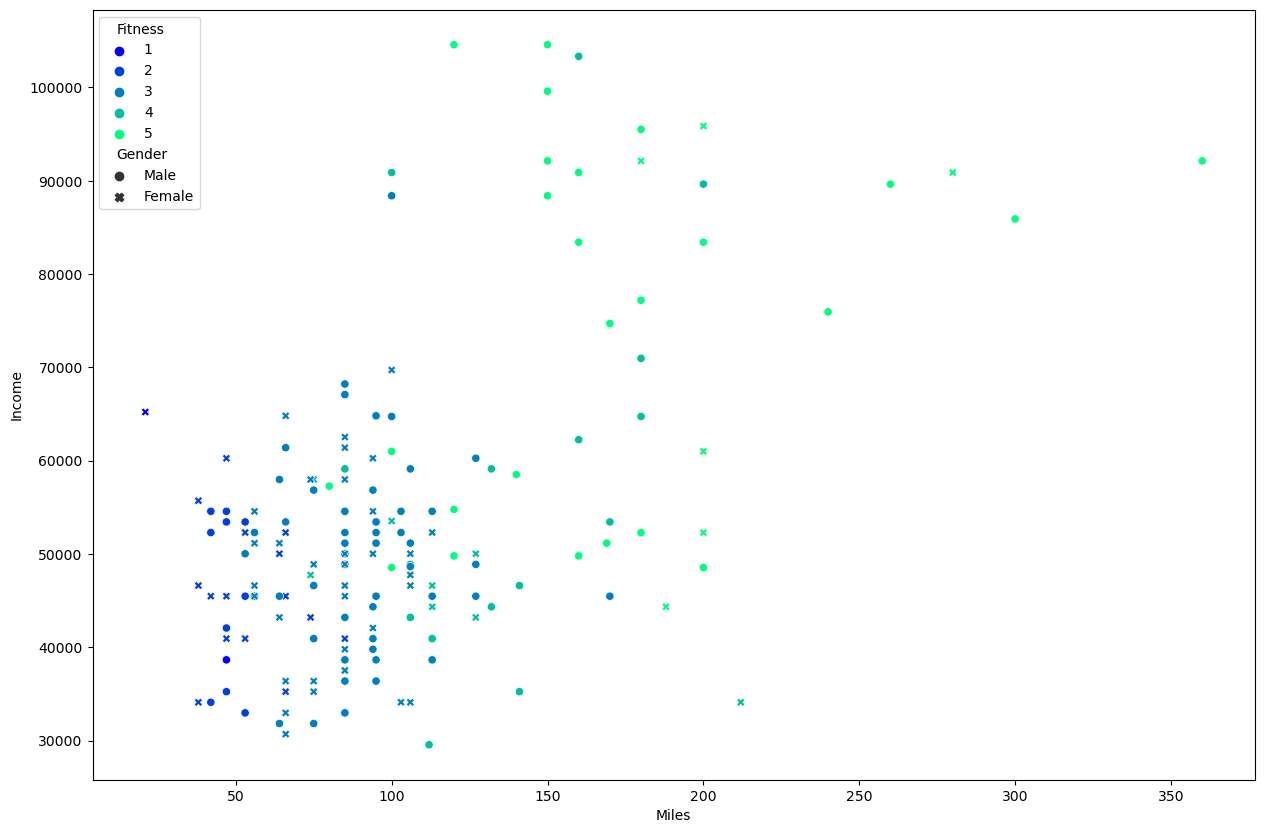

In [164]:
# Scatter Plot
plt.figure(figsize=(15,10))
sns.scatterplot(x='Miles',y='Income',data=df,hue='Fitness',style='Gender',palette='winter')

- The scatter plot shows how customers' income, exercise (running/walking miles), gender, and fitness level are related.
- Most customers have a fitness level between 3 and 4, and those who run more miles tend to have higher fitness levels.
- While there's a general trend where higher income correlates with more miles run, there are only a few customers who earn a lot and also run more miles.

<Axes: xlabel='Education', ylabel='Age'>

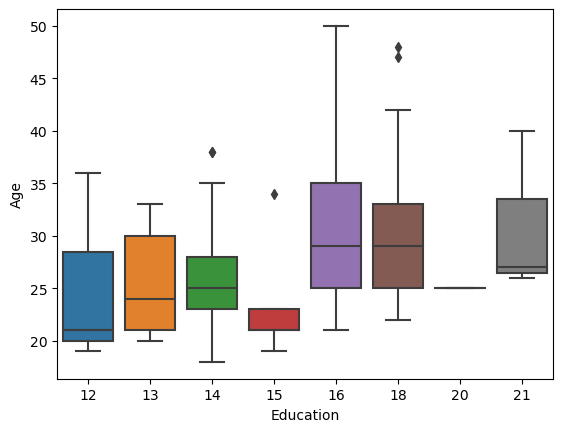

In [165]:
sns.boxplot(x='Education',y='Age',data=df)

- Above box plot shows Education data against Age of the customer

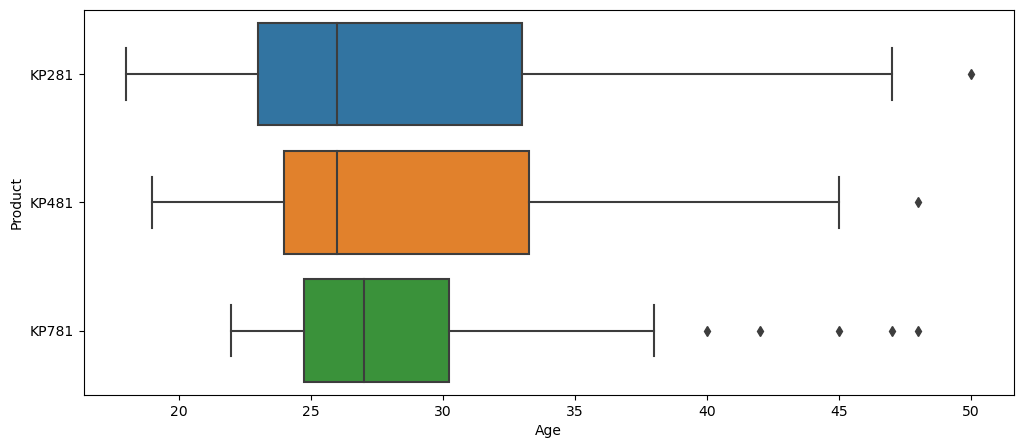

In [166]:
plt.figure(figsize=(12,5))
sns.boxplot(x='Age',y='Product',data=df)
plt.show()

- Only a handful of customers aged above 40 prefer the KP781 product.
- The majority of customers prefer the KP281 product.
- Among younger customers, the KP481 product is the second most popular choice.

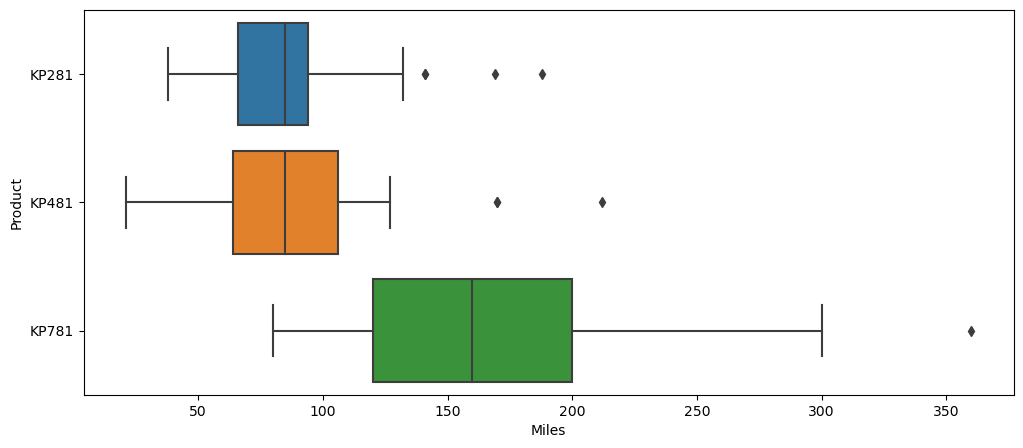

In [167]:
# Miles with each product
plt.figure(figsize=(12,5))
sns.boxplot(x='Miles',y='Product',data=df)
plt.show()

- Customers who use the KP781 product have covered the most miles compared to the other two products.
- The KP481 product is the second-highest in terms of miles covered among customers.
- Customers using the KP281 product have covered less distance compared to the other two product types.

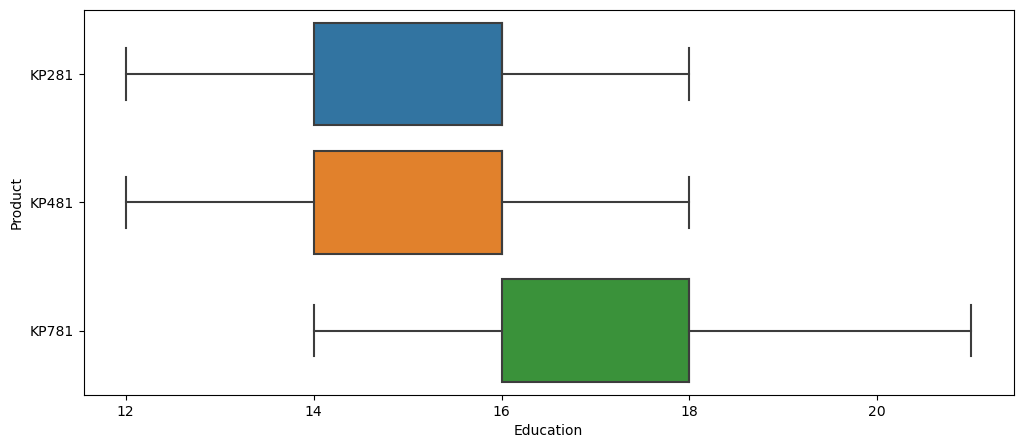

In [168]:
# Education of customers with each product purchased
plt.figure(figsize=(12,5))
sns.boxplot(x='Education',y='Product',data=df)
plt.show()

- Customers with Higher education of 16 to 18 have preferred mostly product type KP781
- Customers with education between 14 to 16 prefer KP281 and KP481 equally

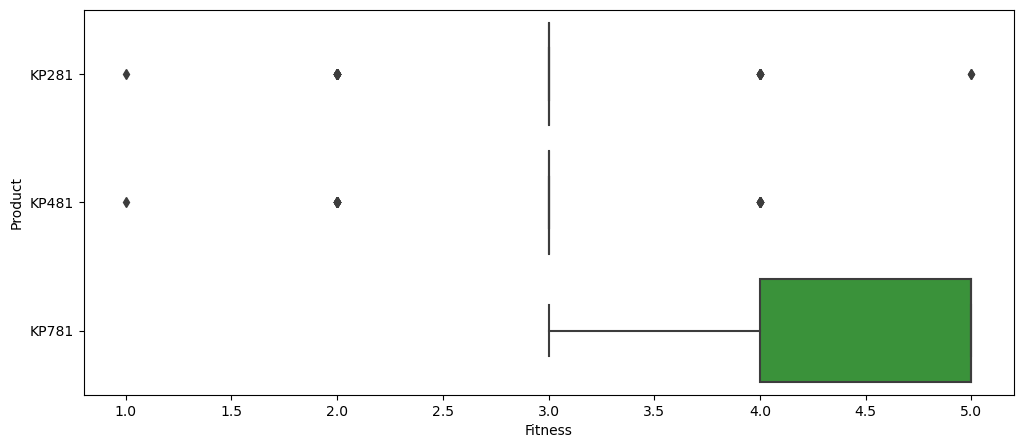

In [169]:
# Fitness of customer with each product
plt.figure(figsize=(12,5))
sns.boxplot(x='Fitness',y='Product',data=df)
plt.show()

- Customers with excellent shape are significantly using KP781 product type
- KP481 and KP281 product type are scattered across the fitness rating

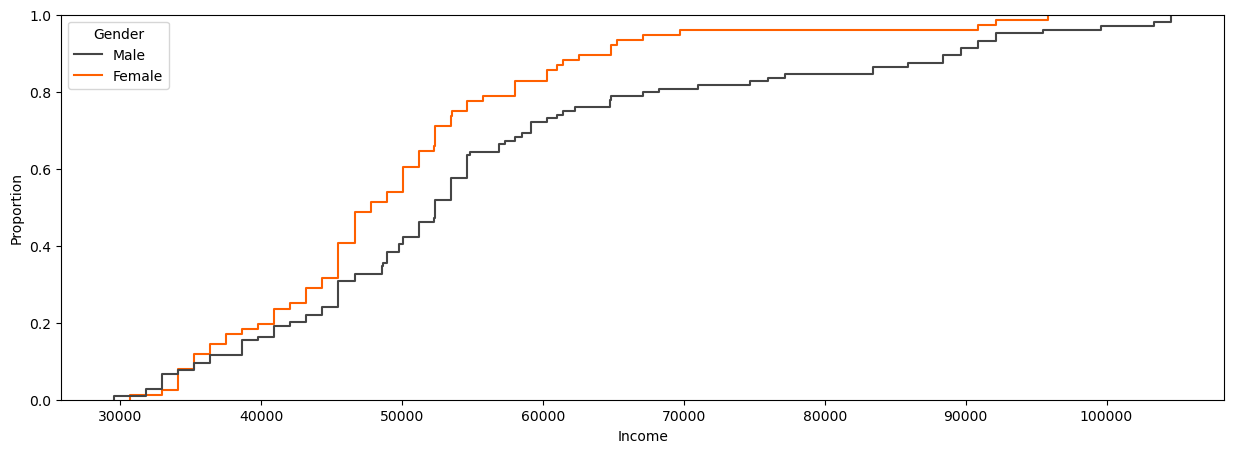

In [170]:
# Empirical Cumulative Distribution Function - proportional distribution for Income of customers against their Gender
plt.figure(figsize=(15,5))
sns.ecdfplot(data=df,x='Income',hue='Gender',complementary=False,palette=['#454545','#FF6000'])
plt.show()

- Customers who earn at least 30k annually can afford Aerofit products.
- A few female customers earning less than 30k have also bought Aerofit products.
- Male customers with higher salaries are the most frequent buyers of the product.

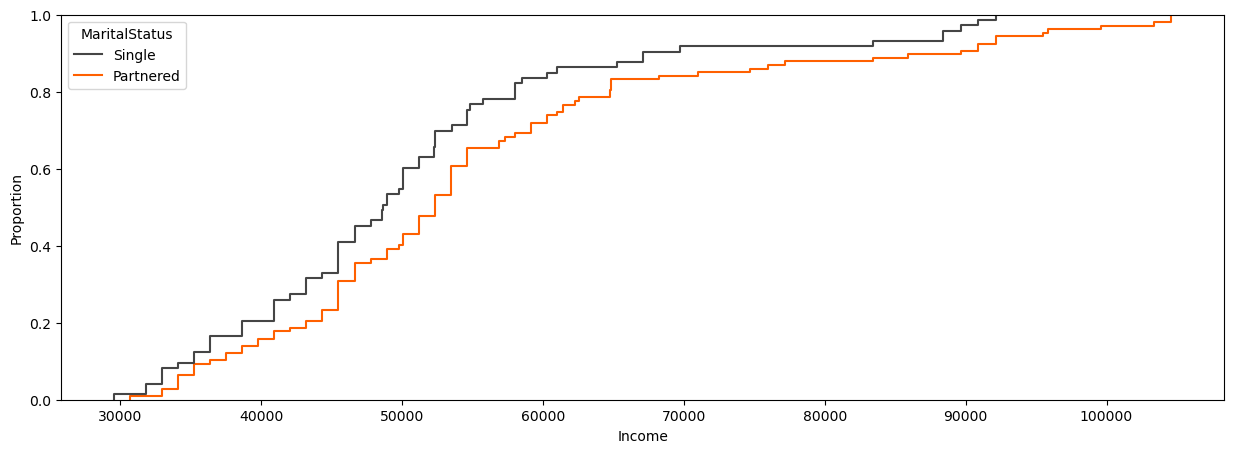

In [171]:
# Empirical Cumulative Distribution Function - proportional distribution for Income of customers against their Marital Status
plt.figure(figsize=(15,5))
sns.ecdfplot(data=df,x='Income',hue='MaritalStatus',complementary=False,palette=['#454545','#FF6000'])
plt.show()

- Single customer have higher proportion than partnered customers
- Partnered customers are more than single customers and they also earn more than single customers

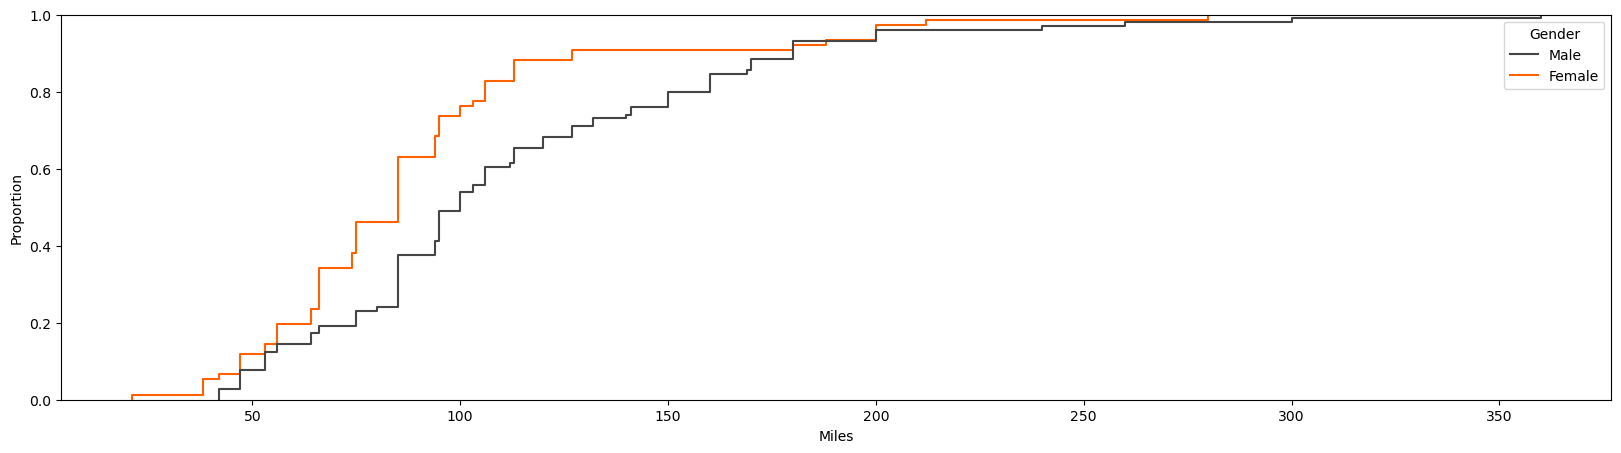

In [172]:
# Empirical Cumulative Distribution Function - proportional distribution for Miles of customers against their Gender
plt.figure(figsize=(20,5))
sns.ecdfplot(data=df,x='Miles',hue='Gender',complementary=False,palette=['#454545','#FF6000'])
plt.show()

- Female customers proportion is higher than the male customers
- Male customers cover more miles than female customer with lower proportion than female customers

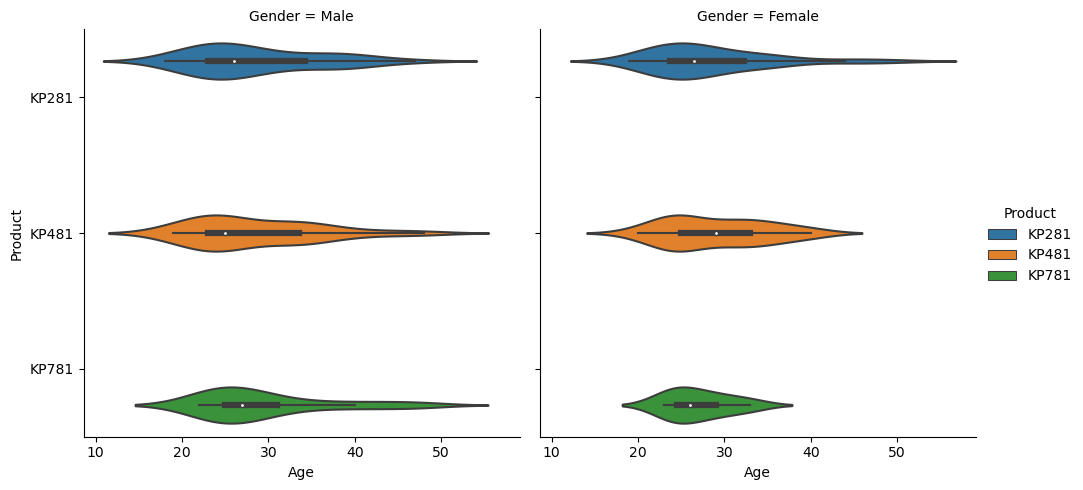

In [173]:
# Product used among age group seggregated by Gender
sns.catplot(x='Age',y='Product',hue='Product',col='Gender',data=df,kind='violin')
plt.show()

- From the above catplot, male customers are equally distributed among the three product types
- Female customers tend to use product KP281 and KP481 more than advanced KP781 product
- Female customers tend to prefer less complicated products than their male counterparts

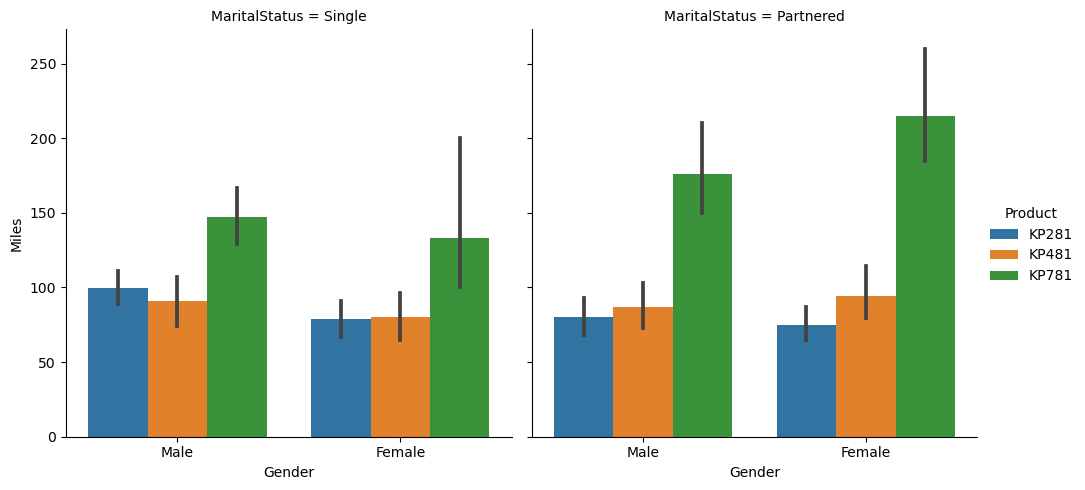

In [174]:
# Miles covered in each product by gender and their marital status
sns.catplot(x='Gender',y='Miles',hue='Product',col='MaritalStatus',data=df,kind='bar')
plt.show()

- The KP781 treadmill is popular among both single and partnered customers.
- Single females don't prefer our products as much.
- Partnered females are more likely to buy the KP781 treadmill compared to partnered males.
- Single females prefer the KP281 treadmill slightly more than single males.
- Partnered males prefer the KP281 treadmill slightly more than single males.
- There are more single males buying treadmills than single females.
- Single males also buy the KP781 treadmill more than single females.
- Overall, there are more partnered customers than single customers.

# 4. Missing Value & Outlier Detection

In [175]:
df.isna().sum()

Product             0
Age                 0
Gender              0
Education           0
MaritalStatus       0
Usage               0
Fitness             0
Income              0
Miles               0
Fitness_category    0
dtype: int64

No Null values found in any columns

In [176]:
df.duplicated().sum()

0

No duplicates have been observed

<b> Outliers </b>

Outliers for other categorical data are mentioned inline with the respective analysis

In [205]:
# Outlier calculation for Miles using Inter Quartile Range
q_75, q_25 = np.percentile(df['Miles'], [75 ,25])
miles_iqr = q_75 - q_25
print("Inter Quartile Range for Miles is", miles_iqr)

Inter Quartile Range for Miles is 48.75


# 5. Business Insights based on Non-Graphical and Visual Analysis

In [206]:
df.Product.value_counts(normalize=True)

Product
KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: proportion, dtype: float64

Probability of buying KP281, KP481 & KP781 are 0.44, 0.33 & 0.22 respectively

In [207]:
df.Gender.value_counts(normalize=True)

Gender
Male      0.577778
Female    0.422222
Name: proportion, dtype: float64

- Probability of Male customer is 0.57
- Probability of Female customer is 0.42

In [208]:
df.MaritalStatus.value_counts(normalize=True)

MaritalStatus
Partnered    0.594444
Single       0.405556
Name: proportion, dtype: float64

- Probability of Married/Partnered is 0.59
- Probability of Single is 0.40

<b> Probability for each product for the both genders </b>

In [209]:
def gender_Probability(gender,df):
    print(f"Probability P(KP781) for {gender}: {round(df['KP781'][gender]/df.loc[gender].sum(),3)}")
    print(f"Probability P(KP481) for {gender}: {round(df['KP481'][gender]/df.loc[gender].sum(),3)}")
    print(f"Probability P(KP281) for {gender}: {round(df['KP281'][gender]/df.loc[gender].sum(),3)}")
    
df_temp = pd.crosstab(index=df['Gender'],columns=[df['Product']])
print("Probability of Male: ",round(df_temp.loc['Male'].sum()/len(df),3))
print("Probability of Female: ",round(df_temp.loc['Female'].sum()/len(df),3))
print()
gender_Probability('Male',df_temp)
print()
gender_Probability('Female',df_temp)

Probability of Male:  0.578
Probability of Female:  0.422

Probability P(KP781) for Male: 0.317
Probability P(KP481) for Male: 0.298
Probability P(KP281) for Male: 0.385

Probability P(KP781) for Female: 0.092
Probability P(KP481) for Female: 0.382
Probability P(KP281) for Female: 0.526


<b> Probability of each product for given Marital Status </b>

In [210]:
def MS_Probability(ms_status,df):
    print(f"Probability P(KP781) for {ms_status}: {round(df['KP781'][ms_status]/df.loc[ms_status].sum(),3)}")
    print(f"Probability P(KP481) for {ms_status}: {round(df['KP481'][ms_status]/df.loc[ms_status].sum(),3)}")
    print(f"Probability P(KP281) for {ms_status}: {round(df['KP281'][ms_status]/df.loc[ms_status].sum(),3)}")
    
df_temp = pd.crosstab(index=df['MaritalStatus'],columns=[df['Product']])
print("Probability of P(Single): ",round(df_temp.loc['Single'].sum()/len(df),3))
print("Probability of P(Married/Partnered): ",round(df_temp.loc['Partnered'].sum()/len(df),3))
print()
MS_Probability('Single',df_temp)
print()
MS_Probability('Partnered',df_temp)

Probability of P(Single):  0.406
Probability of P(Married/Partnered):  0.594

Probability P(KP781) for Single: 0.233
Probability P(KP481) for Single: 0.329
Probability P(KP281) for Single: 0.438

Probability P(KP781) for Partnered: 0.215
Probability P(KP481) for Partnered: 0.336
Probability P(KP281) for Partnered: 0.449


<b> Customer Age Group Analysis </b>

In [211]:
df_category['age_group'] = df_category.Age
df_category.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Fitness_category,age_group
0,KP281,18,Male,14,Single,3,4,29562,112,Good Shape,18
1,KP281,19,Male,15,Single,2,3,31836,75,Average Shape,19
2,KP281,19,Female,14,Partnered,4,3,30699,66,Average Shape,19
3,KP281,19,Male,12,Single,3,3,32973,85,Average Shape,19
4,KP281,20,Male,13,Partnered,4,2,35247,47,Bad Shape,20


In [212]:
# 0-21 -> Teen
# 22-35 -> Adult
# 36-45 -> Middle Age
# 46-60 -> Elder Age

In [213]:
df_category.age_group = pd.cut(df.age_group,bins=[0,21,35,45,60],labels=['Teen','Adult','Middle Aged','Elder'])

In [214]:
df_category.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Fitness_category,age_group
0,KP281,18,Male,14,Single,3,4,29562,112,Good Shape,Teen
1,KP281,19,Male,15,Single,2,3,31836,75,Average Shape,Teen
2,KP281,19,Female,14,Partnered,4,3,30699,66,Average Shape,Teen
3,KP281,19,Male,12,Single,3,3,32973,85,Average Shape,Teen
4,KP281,20,Male,13,Partnered,4,2,35247,47,Bad Shape,Teen


In [215]:
df_category.age_group.value_counts()

age_group
Adult          135
Middle Aged     22
Teen            17
Elder            6
Name: count, dtype: int64

In [216]:
df_category.loc[df_category.Product=='KP281']["age_group"].value_counts()

age_group
Adult          56
Middle Aged    11
Teen           10
Elder           3
Name: count, dtype: int64

In [217]:
df_category.loc[df_category.Product=='KP481']["age_group"].value_counts()

age_group
Adult          45
Teen            7
Middle Aged     7
Elder           1
Name: count, dtype: int64

In [218]:
df_category.loc[df_category.Product=='KP781']["age_group"].value_counts()

age_group
Adult          34
Middle Aged     4
Elder           2
Teen            0
Name: count, dtype: int64

In [219]:
pd.crosstab(index=df_category.Product,columns=df_category.age_group,margins=True)

age_group,Teen,Adult,Middle Aged,Elder,All
Product,,,,,
KP281,10,56,11,3,80
KP481,7,45,7,1,60
KP781,0,34,4,2,40
All,17,135,22,6,180


In [220]:
# Conditional and Marginal Probabilities with product type and age group
np.round(pd.crosstab(index=df_category.Product,columns=df_category.age_group,normalize='columns',margins=True)*100,2)

age_group,Teen,Adult,Middle Aged,Elder,All
Product,,,,,
KP281,58.82,41.48,50.00,50.00,44.44
KP481,41.18,33.33,31.82,16.67,33.33
KP781,0.00,25.19,18.18,33.33,22.22


In [221]:
# Conditional and Marginal Probabilities with product type and age group
np.round(pd.crosstab(index=df_category.Product,columns=df_category.age_group,normalize=True,margins=True)*100,2)

age_group,Teen,Adult,Middle Aged,Elder,All
Product,,,,,
KP281,5.56,31.11,6.11,1.67,44.44
KP481,3.89,25.00,3.89,0.56,33.33
KP781,0.00,18.89,2.22,1.11,22.22
All,9.44,75.00,12.22,3.33,100.00


In [222]:
pd.crosstab(columns=df_category["Fitness_category"],index=df_category["Product"])

Fitness_category,Average Shape,Bad Shape,Excellent Shape,Good Shape,Poor Shape
Product,,,,,
KP281,54,14,2,9,1
KP481,39,12,0,8,1
KP781,4,0,29,7,0


In [223]:
round(pd.crosstab(index=df_category["Product"],columns=df_category["Fitness_category"],normalize="columns")*100,2)

Fitness_category,Average Shape,Bad Shape,Excellent Shape,Good Shape,Poor Shape
Product,,,,,
KP281,55.67,53.85,6.45,37.50,50.0
KP481,40.21,46.15,0.00,33.33,50.0
KP781,4.12,0.00,93.55,29.17,0.0


In [224]:
pd.crosstab(index=[df_category.Product,df_category.Fitness_category],columns=df_category.Gender)

Gender                    Female  Male
Product Fitness_category              
KP281   Average Shape         26    28
        Bad Shape             10     4
        Excellent Shape        1     1
        Good Shape             3     6
        Poor Shape             0     1
KP481   Average Shape         18    21
        Bad Shape              6     6
        Good Shape             4     4
        Poor Shape             1     0
KP781   Average Shape          1     3
        Excellent Shape        5    24
        Good Shape             1     6

In [225]:
round(pd.crosstab(index=[df_category.Product,df_category.Fitness_category],columns=df_category.Gender,normalize=True)*100,2)

Gender                    Female   Male
Product Fitness_category               
KP281   Average Shape      14.44  15.56
        Bad Shape           5.56   2.22
        Excellent Shape     0.56   0.56
        Good Shape          1.67   3.33
        Poor Shape          0.00   0.56
KP481   Average Shape      10.00  11.67
        Bad Shape           3.33   3.33
        Good Shape          2.22   2.22
        Poor Shape          0.56   0.00
KP781   Average Shape       0.56   1.67
        Excellent Shape     2.78  13.33
        Good Shape          0.56   3.33

In [226]:
round(pd.crosstab(index=[df_category.Product,df_category.MaritalStatus],columns=df_category.Gender,normalize=True),2)

Gender                 Female  Male
Product MaritalStatus              
KP281   Partnered        0.15  0.12
        Single           0.07  0.11
KP481   Partnered        0.08  0.12
        Single           0.08  0.06
KP781   Partnered        0.02  0.11
        Single           0.02  0.08

## Conditional and Marginal Probabilities

<b> Two-Way Contingency Table </b>

<b> Marginal Probabilities </b>

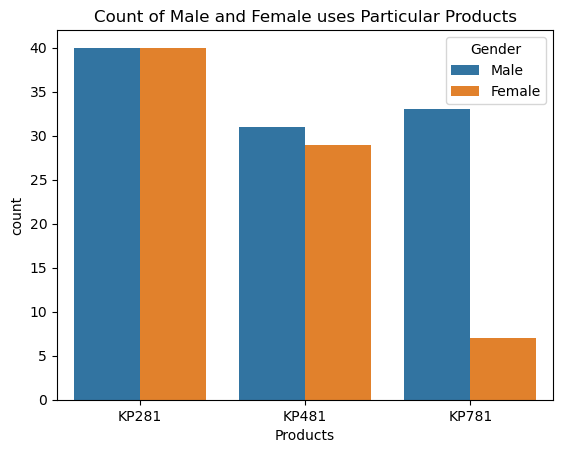

In [227]:
sns.countplot(x = "Product", data= df, hue = "Gender")
plt.xlabel("Products")
plt.title("Count of Male and Female uses Particular Products")
plt.show()

In [228]:
pd.crosstab([df.Product],df.Gender,margins=True)

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


In [229]:
np.round(((pd.crosstab(df.Product,df.Gender,margins=True))/180)*100,2)

Gender,Female,Male,All
Product,,,
KP281,22.22,22.22,44.44
KP481,16.11,17.22,33.33
KP781,3.89,18.33,22.22
All,42.22,57.78,100.00


<b> Marginal Probability </b>

- Probability of Male Customer Purchasing any product is : 57.77 %
- Probability of Female Customer Purchasing any product is : 42.22 %

<b> Marginal Probability of any customer buying </b>

- product KP281 is : 44.44 % (cheapest / entry level product)
- product KP481 is : 33.33 % (intermediate user level product)
- product KP781 is : 22.22 % (Advanced product with ease of use that help in covering longer distance)

<b> Conditional Probabilities </b>

In [230]:
np.round((pd.crosstab([df.Product],df.Gender,margins=True,normalize="columns"))*100,2)

Gender,Female,Male,All
Product,,,
KP281,52.63,38.46,44.44
KP481,38.16,29.81,33.33
KP781,9.21,31.73,22.22


Probability of Selling Product

KP281 | Female = 52 %

KP481 | Female = 38 %

KP781 | Female = 10 %

KP281 | male = 38 %

KP481 | male = 30 %

KP781 | male = 32 %

- More females (52.63%) prefer the KP281 product compared to males (38.46%).
- KP281 is a better choice for females.
- More males (31.73%) prefer the KP781 product compared to females (9.21%).
- KP481 is favored by more females (38.15%) than males (29.80%). It's recommended for females who are intermediate users.

<b> Objective: Customer Profiling for Each Product </b>

Customer profiling based on the 3 product categories provided

KP281

- KP281 is an affordable entry-level product and is also the best-selling one.
- It's the top choice among new customers.
- Both male and female customers find it affordable.
- Customers typically cover around 70 to 90 miles with this model.
- It's used 3 to 4 times a week on average.
- Most customers who bought this product rated their fitness level as average.
- It's popular among younger to older beginners.
- Single females and partnered males buy this product more than single males.
- Customers with incomes ranging from $39,000 to $53,000 prefer this product.

KP481

- KP481 is the second most popular product we sell.
- Users of this product have varying fitness levels, but they mainly use it to cover long distances rather than focusing on improving fitness.
- On average, they cover between 70 to 130 miles per week.
- More women prefer this product compared to men, especially those at an intermediate fitness level.
- People of different ages, including teens, adults, and middle-aged individuals, like this treadmill.
- The average income of those who buy KP481 is $49,000 per year.
- They typically use the treadmill three days per week.
- More partnered customers tend to buy this product.
- While there are slightly more male buyers overall, the preference for KP481 is equal among single and partnered, male and female buyers.
- The average distance traveled on the KP481 treadmill is between 75 to 100 miles, making it the second most used model.
- The age range of KP481 treadmill customers is roughly between 24 to 34 years.

KP781

- Customers buy this product less because it's expensive and advanced.
- They mainly use it to cover long distances and rate themselves as very fit.
- On average, they walk/run 120 to 200 miles per week, using it 4 to 5 times weekly.
- Females, especially those who run a lot, prefer the KP781 model, covering about 180 miles weekly, more than males.
- But more males (31.73%) tend to buy KP781 compared to females (9.21%).
- Single people are more likely to buy it than married ones, especially if they exercise a lot.
- Middle-aged and older customers often choose this model for long-distance walking/running.
- Buyers of KP781 earn over $75,000 per year on average.
- Partnered females are more likely to buy it than partnered males.
- Those familiar with Aerofit products tend to prefer this one.
- Customers with higher education and income are more inclined to buy it.

# 6. Recommendations

- Organize fitness challenges or events to highlight treadmill capabilities and foster community engagement.
- Partner with gyms or fitness centers to showcase treadmill models and offer trial sessions.
- Gather feedback from customers to understand their needs better and improve products.
- Provide extended warranties or maintenance packages for customer peace of mind.
- Collaborate with fitness apps to integrate treadmill features and enhance the workout experience.
- Expand marketing efforts to include social media platforms, online communities, and forums.
- Develop personalized training plans or fitness programs tailored to each treadmill model's features.
- Target customers over 40 years old for KP781 promotions and marketing efforts.
- Recommend KP781 for women who exercise extensively, with easy-to-follow usage instructions.
- Sponsor local community events or fitness initiatives to increase brand visibility and goodwill.